#  Pandas

利用Pandas，我們可以分析time series，Pandas有兩種主要的資料結構：
* Series：一條時間序列
* DataFrame：很多的時間序列


## 創建

Series 的創建可以參考[Pandas 文檔](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

In [92]:
import pandas as pd

s = pd.Series([1,2,3,4])
s

0    1
1    2
2    3
3    4
dtype: int64

* 第一條columns顯示0～3，為index
* 第二條就是每個index所對應到的值


In [93]:
date = pd.date_range('20180101', periods=6)
# sr = ['a', 'b', 'c', 'd', 'e', 'f']
s = pd.Series([1,2,3,4,5,6], index=date)
s

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

In [6]:
s = pd.Series(2, index=date)
s

2018-01-01    2
2018-01-02    2
2018-01-03    2
2018-01-04    2
2018-01-05    2
2018-01-06    2
Freq: D, dtype: int64

## 查找

In [45]:
# 建立一個 time series
date = pd.date_range('20180101', periods=6)
s = pd.Series([1,2,3,4,5,6], index=date)
print(s)

# 查找
s.loc['20180104']

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64


4

In [94]:
s.loc['2018-01-01':'2018-01-04']

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
Freq: D, dtype: int64

In [47]:
s.iloc[0]

1

In [10]:
s.iloc[1:4]

2018-01-02    2
2018-01-03    3
2018-01-04    4
Freq: D, dtype: int64

## 修改

In [88]:
l = [1,2,3,4,5,6]
date_index = pd.date_range('20180101', periods=6)

s = pd.Series(l, index=date_index)
s

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

In [97]:
print(s)
s.max()
# s.min()
# s.mean()
# s.std()

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64


6

In [98]:
print(s)
s.cumsum()
# s.cumprod()

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64


2018-01-01     1
2018-01-02     3
2018-01-03     6
2018-01-04    10
2018-01-05    15
2018-01-06    21
Freq: D, dtype: int64

In [100]:
print(s)
# s + 1
#s - 1
# s * 2
#s / 2
s > 3

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64


2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04     True
2018-01-05     True
2018-01-06     True
Freq: D, dtype: bool

## 繪圖

<AxesSubplot:>

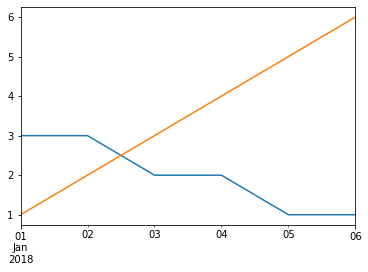

In [101]:
%matplotlib inline
date2 = pd.date_range('20180101', periods=6)
a = pd.Series([3,3,2,2,1,1], index=date)
a.plot()
s.plot()

## 綜合應用！

In [102]:
print(s)
larger_than_3 = s > 3
print(larger_than_3)
s[larger_than_3]
# s.loc[larger_than_3] + 2


2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64
2018-01-01    False
2018-01-02    False
2018-01-03    False
2018-01-04     True
2018-01-05     True
2018-01-06     True
Freq: D, dtype: bool


2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, dtype: int64

In [103]:
s.loc[larger_than_3] += 1
s

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    5
2018-01-05    6
2018-01-06    7
Freq: D, dtype: int64

### Question

假設某小明體重從'2018-01-01'為60公斤，由於在'2018-01-03'吃太多，導致隔天起床發現變重5公斤，

請畫出小明體重的time series

<AxesSubplot:>

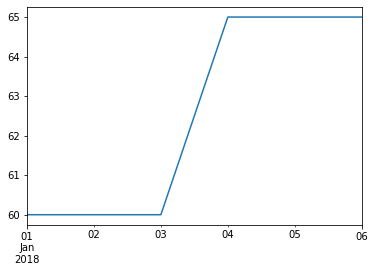

In [28]:
weight = pd.Series(60, index=pd.date_range('2018-01-01', periods=6))
weight.loc['2018-01-04':] += 5
# weight
weight.plot()

# DataFrame 介紹！

DataFrame 基本上，就是很多的time series，

藉由dataframe，能以相同的function，直接修改多個Series

In [104]:
s1 = pd.Series([1,2,3,4,5,6], index=date)
s2 = pd.Series([5,6,7,8,9,10], index=date)
s3 = pd.Series([11,12,5,7,8,2], index=date)

dictionary = {
    'c1': s1,
    'c2': s2,
    'c3': s3,
}

df = pd.DataFrame(dictionary)
df

,c1,c2,c3
2018-01-01,1,5,11
2018-01-02,2,6,12
2018-01-03,3,7,5
2018-01-04,4,8,7
2018-01-05,5,9,8
2018-01-06,6,10,2


<AxesSubplot:>

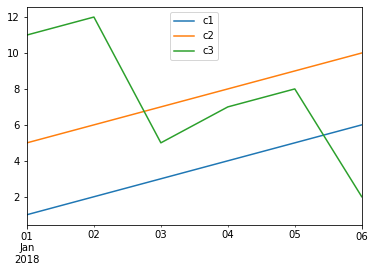

In [73]:
%matplotlib inline
df.plot()

## 選取

選取方式幾乎一樣

In [105]:
print(df)
df.loc['2018-01-02']

            c1  c2  c3
2018-01-01   1   5  11
2018-01-02   2   6  12
2018-01-03   3   7   5
2018-01-04   4   8   7
2018-01-05   5   9   8
2018-01-06   6  10   2


c1     2
c2     6
c3    12
Name: 2018-01-02 00:00:00, dtype: int64

In [107]:
print(df)
df.iloc[2]

            c1  c2  c3
2018-01-01   1   5  11
2018-01-02   2   6  12
2018-01-03   3   7   5
2018-01-04   4   8   7
2018-01-05   5   9   8
2018-01-06   6  10   2


c1    3
c2    7
c3    5
Name: 2018-01-03 00:00:00, dtype: int64

In [106]:
df.loc['2018-01-02':'2018-01-05', ['c1', 'c2']]

,c1,c2
2018-01-02,2,6
2018-01-03,3,7
2018-01-04,4,8
2018-01-05,5,9


In [38]:
df.iloc[1:4, [0, 1]]

,c1,c2
2018-01-02,2,6
2018-01-03,3,7
2018-01-04,4,8


In [42]:
df.cumsum()

,c1,c2,c3
2018-01-01,1,5,11
2018-01-02,3,11,23
2018-01-03,6,18,28
2018-01-04,10,26,35
2018-01-05,15,35,43
2018-01-06,21,45,45


In [75]:
df.cumprod()

,c1,c2,c3
2018-01-01,1,5,11
2018-01-02,2,30,132
2018-01-03,6,210,660
2018-01-04,24,1680,4620
2018-01-05,120,15120,36960
2018-01-06,720,151200,73920


## DataFrame 特有功能

In [77]:
df['c1']

2018-01-01    1
2018-01-02    2
2018-01-03    3
2018-01-04    4
2018-01-05    5
2018-01-06    6
Freq: D, Name: c1, dtype: int64

In [78]:
print(df)
df.cumsum(axis=1)

            c1  c2  c3
2018-01-01   1   5  11
2018-01-02   2   6  12
2018-01-03   3   7   5
2018-01-04   4   8   7
2018-01-05   5   9   8
2018-01-06   6  10   2


,c1,c2,c3
2018-01-01,1,6,17
2018-01-02,2,8,20
2018-01-03,3,10,15
2018-01-04,4,12,19
2018-01-05,5,14,22
2018-01-06,6,16,18
